In [14]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal as sg
import numpy as np

In [22]:
def gauss_kernel(n, std, normalised=False):
    """
    Generate a n x n matrix with a gaussian centered on it.
    The distributions standard dev is std. If normalised, its volume equals 1.
    """
    gaussian = sg.gaussian(n, std)
    gaussian2d = np.outer(gaussian, gaussian)

    if normalised:
        gaussian2d /= (2 * np.pi * (std**2))

    return gaussian2d

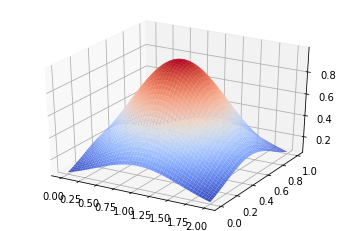

In [23]:
size = 50

# create a 21x21 vertex mesh
xx, yy = np.meshgrid(np.linspace(0,2,size), np.linspace(0,1,size))
                     
# create vertices for a rotated mesh (3D rotation matrix)
X = xx 
Y = yy
Z = gauss_kernel(size, 15)

# create some dummy data (20 x 20) for the image
data = np.cos(xx) * np.cos(xx) + np.sin(yy) * np.sin(yy)

# create the figure
fig = plt.figure()

# show the reference image
ax1 = fig.add_subplot(projection='3d')
# show the 3D rotated projection
ax1.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0)